# <a id='toc1_'></a>[Quantum chemistry survey](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

23 Janvier 2024

### <a id='toc1_4_2_'></a>[SOLUTION](#toc0_)

####  <a id='toc1_3_'></a>[Utilisation de `RDKIT`pour la generer des coordonnees 3D xyz](#toc0_)
<!-- ![Rdkit.png](attachment:Rdkit.png) -->
![Rdkit.png](./Graphics/Rdkit.png)

### Présentation de la Molecules

###  Description
  La molecules 1,3-thiazole [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/Thiazole)
* Formule brute `C3H3NS`
* PubChem Cid  = `9256`
* IUPAC name `1,3-Thiazole`
* Masse molaire=`85,13 g/mole`
* Isimetric SMILE: `C1=CSC=N1`

Le 1,3-thiazole est une molécule organique hétérocyclique constituée d'un anneau de cinq atomes, comprenant trois atomes de carbone, un atome de soufre et un atome d'azote. Sa formule chimique est C3H3NS.

Structurellement, le 1,3-thiazole peut être représenté comme un anneau plan avec un atome de soufre et un atome d'azote alternant avec les atomes de carbone. Les atomes de carbone forment une chaîne ouverte, tandis que l'azote et le soufre sont reliés à deux atomes de carbone adjacents. Ceci crée une alternance de doubles liaisons et de simples liaisons dans l'anneau.

Le 1,3-thiazole présente des propriétés aromatiques en raison de la délocalisation des électrons pi à travers l'anneau, ce qui lui confère une stabilité particulière. Il peut exister sous forme de tautomères, où l'azote peut se trouver soit en position 1, soit en position 3 de l'anneau.

Cette molécule présente une certaine polarité en raison de la différence d'électronégativité entre le soufre et l'azote, ce qui peut influencer ses interactions avec d'autres molécules et solvants.



###    Intérêt

Le 1,3-thiazole est une molécule d'intérêt dans divers domaines de la chimie et de la biologie en raison de ses propriétés uniques. Voici quelques-uns des intérêts associés à cette molécule :

*  `Chimie organique`: Le 1,3-thiazole est utilisé comme motif structurel dans le développement de nombreux composés organiques. Sa présence confère souvent des propriétés spécifiques aux molécules, telles que des activités biologiques ou des interactions spécifiques avec d'autres molécules.

* `Pharmacologie`: De nombreux composés dérivés du 1,3-thiazole ont montré des activités pharmacologiques intéressantes. Certains d'entre eux sont utilisés comme médicaments ou sont étudiés pour leur potentiel thérapeutique dans le traitement de diverses maladies, comme le cancer, les infections bactériennes ou les maladies neurodégénératives.

* `Agriculture`: Certains dérivés du 1,3-thiazole sont utilisés en agriculture comme agents de protection des cultures. Ces composés peuvent avoir des propriétés fongicides ou insecticides, aidant ainsi à prévenir les maladies des plantes et les infestations d'insectes nuisibles.

* `Chimie des matériaux`: Le 1,3-thiazole et ses dérivés sont également utilisés dans la synthèse de matériaux polymères. Ces polymères peuvent présenter des propriétés intéressantes, telles que la conductivité électrique ou la capacité d'absorber la lumière, ce qui les rend utiles dans des applications telles que les cellules solaires, les capteurs ou les dispositifs électroniques.

### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

1. Etudier la convergence des ensembles de base pour une série de fonctionnelles de la
théorie fonctionnelle de la densité (DFT) (non hybrides (PBE, TPSS) et hybrides
(B3LYP)).
2. Comparer les calculs DFT, MP2, CCSD et CCSD(T).
3. Calculer les propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,
Oscillator strength, Lifetime, Multi-objective function.
4. Tracer le spectre UV/Vis avec les trois fonctionnelles précédentes.

` NB`: Tous les résultats seront commentés/analysés. L'intérêt de chaque molécule étudiée sera
spécifié. N'hésitez pas à faire des recherches supplémentaires. Vous êtes en Master!!

In [2]:
#importation des packages  rdkit
from rdkit import Chem

#### **Création `RDKit` d'un objet moléculaire**

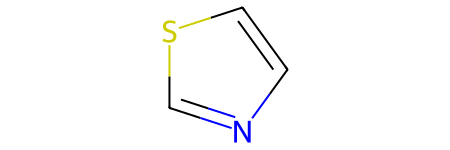

In [3]:
### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

#  Convertir le SMILES en objet RDKit Mol
smiles = "C1=CSC=N1"#https://pubchem.ncbi.nlm.nih.gov/compound/Thiazole
mol = Chem.MolFromSmiles(smiles)
mol

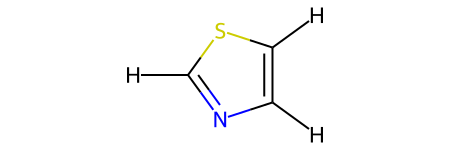

In [6]:
mol = Chem.AddHs(mol)
mol

In [8]:
import os
import pandas as pd
from rdkit.Chem import Descriptors
properties = ['Poids_Mol','poids_mol_moy', 'LogP', 'TPSA','hbd','hba']

# Calcul des descripteurs
#poid_moleculaire
molwt = Descriptors.MolWt(mol)
#poid moleculaire moyen
molwtE = Descriptors.ExactMolWt(mol)
# solubilite
logp = Descriptors.MolLogP(mol)
#polarite
tpsa = Descriptors.TPSA(mol)
#nombre de liasons donneurs d'H
hbd = Descriptors.NumHDonors(mol)
#nombre de liason accepteurs d'H
hba = Descriptors.NumHAcceptors(mol)

# Ajout des propriétés à la liste de données
data=[molwt , molwtE, logp, tpsa,hbd,hba]
data1=[85.13 ,84.9862027  ,'NAN', 41.1 ,0,2]

df_HF = pd.DataFrame({"properties ":properties, 
                      'valeurs':data,
                      "valeurs_pupchem":data1})
df_HF.set_index("properties ", inplace=True)### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

df_HF

,valeurs,valeurs_pupchem
properties,,
Poids_Mol,85.13100,85.13
poids_mol_moy,84.99862,84.986203
LogP,1.14310,NAN
TPSA,12.89000,41.1
hbd,0.00000,0
hba,2.00000,2


Les informations présentes dans le DataFrame pandas sont: 

* `Poids_Mol` : Il s'agit du `poids moléculaire` de la molécule, exprimé en grammes par mole `(g/mol)`. C'est la masse totale de la molécule qui est de `85.131g/mol` qui est equivalent a celle de `pubchem` estimé a  `85,13 g/mol`

* `poids_mol_moy` : Il s'agit du `poids moléculaire moyen`, calculé en prenant en compte la distribution isotopique des atomes donc la valeurs est de `84.99862g\mol` . qui est légèrement différent du poids moléculaire brute.

* `LogP` : Il s'agit du coefficient de partage `octanol/eau (logP)` de la molécule. Un coefficient de partage `octanol/eau (logP)` de `1.1431` suggère une légère `hydrophobicité`(tendance d'une substance à repousser ou à éviter l'eau) pour la molécule. Qui est l'aptitude de la molécule à traverser les membranes biologiques

* `TPSA` : Il s'agit de la surface polaire totale `Total Polar Surface Area)` de la molécule, exprimée en `Å² (angstroms carrés)`. C'est une mesure de la surface de la molécule qui est polaire et capable d'interactions avec des solvants polaires sa valeurs ici est de `12.89Å²`.

* `hbd` : Il s'agit du nombre de donneurs de liaisons hydrogène `(hydrogen bond donors)` dans la molécule. Cela compte le nombre d'atomes d'hydrogène liés à des atomes d'oxygène, d'azote ou de soufre, qui peuvent former des liaisons hydrogène étant donné que la dans le cas de la molécule `1,3-Thiazole` les atomes d'hydrogènes  n'ont que des liaisons  avec les atomes de carbones en conséuent on a une valeurs `hba= 0`.

* `hba` : Il s'agit du nombre d'accepteurs de liaisons hydrogène `(hydrogen bond acceptors)` dans la molécule. Cela compte le nombre d'atomes d'oxygène, d'azote ou de soufre dans la molécule, qui peuvent accepter des liaisons hydrogène,dans notre molécule nous uniquement un atome de soufre et un atome d'azote d'ou la valeur de `hba=2`.

### **Ajouter des atomes H a mon objet  mol pour la structure 3D**

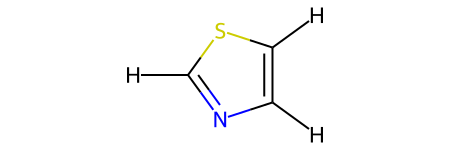

In [9]:
mol = Chem.AddHs(mol)
mol

In [10]:
#observer le nombres d'atomes de mon objet mol 
mol.GetNumAtoms()

8

### **Générer  des `conformers`  et de les intégrer à la structure 3D**



In [11]:
# importation  des modules Allchem et Chem de rdkit
import rdkit
from rdkit.Chem import AllChem

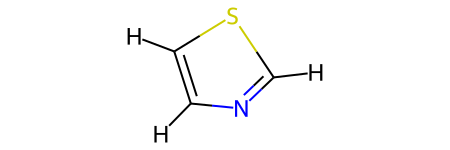

In [12]:
confid = AllChem.EmbedMolecule(mol)
mol

In [13]:
rdkit.Chem.Draw.IPythonConsole.drawMol3D(mol, view=None, confId=-1, drawAs=None, bgColor=None, size=None)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.6299719515232227 -0.7320562035722435 0.01452452595005664
C -1.0546783472253567 0.6016531554090455 0.01649692839849094
S 0.43600434848581554 1.5152142900117833 0.22633762477064764
C 1.4926434541720353 -0.06300155442388984 0.28884641374783515
N 0.6624798284497175 -0.858628229214857 0.1608699526576734
H -1.3961022024712715 -1.516839883034544 -0.105549903735433
H -2.0820683219388076 0.9891551466997455 -0.08871635801702095
H 2.571693192051105 0.06450327812496663 0.4200743311879385


In [17]:
mol_1 = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_1 = '\n'.join(mol_1.strip().split('\n')[1:])
print(mol_1)


C     -0.649109   -0.750954    0.011545
C     -0.987698    0.595973    0.024192
S      0.429959    1.475851    0.224183
C      1.410378    0.112809    0.285986
N      0.677364   -1.014156    0.156510
H     -1.380325   -1.539439   -0.104603
H     -1.984961    1.002213   -0.076730
H      2.484392    0.117705    0.411801


### **`Optimisation` de la structure 3D de notre objet mol avec ``MMFF94``**

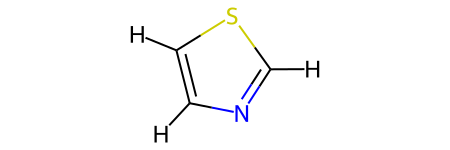

In [18]:
AllChem.UFFOptimizeMolecule(mol)
mol

In [19]:
rdkit.Chem.Draw.IPythonConsole.drawMol3D(mol, view=None, confId=-1, drawAs=None, bgColor=None, size=None)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Génération  des coordonnées 3D des atomes de la structure optimisée**

### **Convertir l'objet mol RDKit en format XYZ**

In [20]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.6491091575130152 -0.7509544333481333 0.011543616892348457
C -0.9876985575958829 0.5959731461956829 0.024192004291893096
S 0.42995983795477644 1.4758505693624653 0.22418208072374615
C 1.410376955854046 0.11280826874102703 0.28598617791066233
N 0.6773643409725072 -1.0141562407733302 0.15650909362615834
H -1.3803248811404878 -1.5394391964358431 -0.10460243902096111
H -1.9849607657290778 1.0022123283424043 -0.07672918035502226
H 2.4843922271971506 0.11770555791579505 0.41180216089136684


In [21]:
mol_xyz = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])

In [22]:
print(mol_xyz)


C     -0.649109   -0.750954    0.011544
C     -0.987699    0.595973    0.024192
S      0.429960    1.475851    0.224182
C      1.410377    0.112808    0.285986
N      0.677364   -1.014156    0.156509
H     -1.380325   -1.539439   -0.104602
H     -1.984961    1.002212   -0.076729
H      2.484392    0.117706    0.411802


####  `Au vue des resultats des coordonnées 3D cela suggère que la conformation initiale de la molécule était proche de sa conformation la plus stable ou la plus énergétiquement favorables`

### Creation d'un fichier .xyz

In [23]:
input_file = "Fichier_xyz.txt"  # Chemin vers le fichier texte d'entrée
output_file = "patrick.xyz"  # Chemin vers le fichier XYPresentationZ de sortie

# Lignes à récupérer dans le fichier texte
lines_to_extract = [60,61,62,63,64,65,66,67,68]

with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
    for line_number, line in enumerate(f_in, start=1):
        if line_number in lines_to_extract:
            f_out.write(line)

print("Fichier XYZ généré :", output_file)

Fichier XYZ généré : patrick.xyz


In [24]:
  # Chemin vers le fichier texte d'entrée

with open(output_file, 'r') as file:
    mol3= file.read()

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol4 = '\n'.join(mol3.strip().split('\n')[1:])
print(mol4)

  C      1.1132      0.2231     -0.4747
  C      0.8191     -1.1118     -0.5272
  H      2.0347      0.6814     -0.8299
  H      1.4416     -1.9170     -0.9226
  S     -0.1701      1.1369      0.2359
  C     -1.0745     -0.3455      0.4400
  N     -0.4473     -1.4266      0.0043
  H     -2.0693     -0.4013      0.8841'''


In [25]:
from rdkit import Chem
from rdkit.Chem import Draw

input_file = "patrick.xyz"  # Chemin vers le fichier XYZ

# Lecture des coordonnées à partir du fichier XYZ
with open(input_file, 'r') as file:
    lines = file.readlines()[1:]  # Ignorer les deux premières lignes d'en-tête
    coordinates = [line.split()[1:4] for line in lines]

# Création de l'objet Mol à partir des coordonnées atomiques
mol = Chem.MolFromXYZBlock('\n'.join([' '.join(coords) for coords in coordinates]))

# Vérification de la création de l'objet Mol
if mol is not None:
    # Visualisation de la molécule en 3D
    image = Draw.MolToImage(mol, size=(300, 300), kekulize=False)

    # Affichage de l'image
    image.show()
else:
    print("Erreur lors de la création de la molécule à partir des coordonnées atomiques.")

Erreur lors de la création de la molécule à partir des coordonnées atomiques.


[13:57:40] Unable to recognize the number of atoms: cannot convert '1.1132 0.2231 -0.4747' to unsigned int on line 0



In [26]:
#mol_xyz = Chem.MolToXYZFile(mol_2,'mol_2.xyz')

#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)

<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/MolecularDimension.png)

1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.

### <a id='toc1_4_2_'></a>[SOLUTION](#toc0_)

## <a id='toc1_1_'></a>[PySCF](#toc0_)

<!-- ![Pyscf.png](attachment:Pyscf.png) -->
![Pyscf.png](./Graphics/Pyscf.png)

In [27]:
import pyscf

pyscf.__version__

'2.4.0'

In [ ]:
from pyscf import gto
mol = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = 'cc-pVDZ',
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol.build()

In [ ]:
import py3Dmol
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}, "sphere":{"radius":0.4}})
xyz_view.setBackgroundColor('0xeeeeee')
xyz_view.show()

In [24]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 44 et le nombre total d'électrons (alpha, béta) est (22, 22)
Le nombre d'orbitales atomiques, dans la base cc-pVDZ, est 89
L'énergie nucléaire vaut 206.59453232010438 Hartrees


### <a id='toc1_1_'></a>1.[Etudions la convergence des ensembles de base pour une série de fonctionnelles de la théorie fonctionnelle de la densité (DFT) (non hybrides (PBE, TPSS) et hybrides](#toc0_)



## <a id='toc1_4_'></a>[Calcul du champ moyen ou mean-field](#toc0_)
Les trois méthodes HF communément utilisées sont (voir la figure ci-dessous) :
![HF_Orb.png](./Graphics/HF_Orb.png)
<!-- <center>
 <img src='./Graphics/HF_Orb.png' width=400 /> 
</center> -->

1. **RHF (Restricted Hartree – Fock)** utiliśee pour des molécules à couches pleines ou fermées. Les spin-orbitales sont soit $\alpha$, soit $\beta$ et tous les orbitales sont doublement occupés par des spin-orbitales $\alpha$ et $\beta$;</br> 
2. **ROHF (Restricted Open-Shell Hartree–Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. ROHF utilise autant que possible les orbitales doublement occupées et les orbitales une fois occupées par les électrons non-apariés;
3. **UHF (Unrestricted Hartree-Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. Les orbitales UHF peuvent avoir avoir des spin $\alpha$ ou $\beta$, mais les orbitales $\alpha$ et $\beta$ peuvent avoir des composants spatiales différents.

Les équivalents DFT sont,

4. **RKS (Kohn-Sham restreint)**,
6. **ROKS (Restricted Open-Shell Kohn – Sham)**,
5. **UKS (Kohn-Sham sans restriction)**.

_soit la smile `C1=CSC=N1`,Pour calculer la configuration électronique de la smile C1=CSC=N1,._

En utilisant la règle de l'octet, nous pouvons déterminer que la configuration électronique de la smile C1=CSC=N1 est la suivante :

* Carbone Z=6: $1s^{2} 2s^{2} 2p^{2}$
* Soufre Z=16: $1s^{2} 2s^{2} 2p^{6} 3s^{2} 2p^{6}$
* Azote z=7: $1s^{2} 2s^{2} 2p^{3}$

_nous devons d'abord déterminer le nombre de valence électrons de chaque atome_.

* Carbone (C) : 4 valence électrons
* Soufre (S) : 8 valence électrons spin(0)
* Azote (N) : 5 valence électrons

Les hf et dft a utliser sont respectivement `RHF`et `RKS`

Pour cela, nous allons utiliser trois fonctionnelles à savoir `PBE`, `TPSS`, `B3LYP

* `B3LYP` : est une `fonctionnelle Hybride personnalisée` qui comprend `20 %` d'échange exact (Hartree-Fock),  `8 %` d'échange `LDA`, `72 %` d'échange `B88`, `19 %` de corrélation `VWN` et `81 %` de corrélation `LYP`.

* `PBE` : est une fonctionnelle non hybride, car la fonctionnelle d'échange et de corrélation sont toutes les deux `PBE`.
* `TPSS` : également est une fonctionnelle non hybride parce que la fonctionnalité d'échange étant la même que la fonctionnalité corrélation `TPSS`.


In [25]:
import numpy as np

# Define the functionals of the density functional theory (DFT)\
functionals = ['PBE', 'TPSS', 'B3LYP']

# Define the calculation methods
methods = ['DFT', 'MP2', 'CCSD', 'CCSD(T)']

In [26]:
# Initialize the dictionary to store the energies and reference values
from pyscf import dft
import time
references = {'PBE': -568.689639, 'TPSS': -569.097443, 'B3LYP': -569.043255}
values = {functional: [] for functional in functionals}

# Perform the calculations
for functional in functionals:
    start = time.time()
    myks = dft.RKS(mol, xc=functional).run()
    end = time.time()
    values[functional].append(myks.e_tot)
    values[functional].append(end - start)
    values[functional].append(references[functional])  # Add the reference value
    values[functional].append((myks.e_tot - references[functional]) * 627.5095)  # Calculate the difference in kcal/mol

# Print the results
for functional, energy in values.items():
    print(f'{functional}: {energy[0]:.4f} eV, {energy[1]:.4f} seconds, Reference: {energy[2]:.4f} eV, Difference: {energy[3]:.4f} kcal/mol')

/home/mvoto/miniconda3/envs/tartarus/lib/python3.8/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -568.681285884097
converged SCF energy = -569.116081719472
converged SCF energy = -569.069362597561
PBE: -568.6813 eV, 26.3814 seconds, Reference: -568.6896 eV, Difference: 5.2417 kcal/mol
TPSS: -569.1161 eV, 73.9189 seconds, Reference: -569.0974 eV, Difference: -11.6960 kcal/mol
B3LYP: -569.0694 eV, 26.7775 seconds, Reference: -569.0433 eV, Difference: -16.3828 kcal/mol


#### _Selon les résultats du calcul SCF, nous pouvons constater que la fonctionnelle `PBE` fournit une énergie supérieure d'une valeur de `-568.6813 eV`, avec un temps de calcul relativement moyen de `23.5953 `secondes, par rapport aux fonctionnelles `B3LYP` qui offre une énergie moyenne de `-569.0694 eV` avec un temps minimal de ` 25.4000` secondes, et `TPSS` qui fournit une énergie très faible de `-569.1161 eV` avec un temps de calcul très élevé de `66.7556 ` secondes. En se basant sur les temps de calcul et les valeurs d'énergie, nous pouvons conclure que la méthode hybride `B3LYP` reste la plus appropriée pour cette molécule avec une erreur minimale sur la valeur de reférence  par rapport au deux autres fonctionnelle de $\Delta{E}$= `-16.3828 kcal/mol` ._

### <a id='toc1_1_'></a>2.[Comparons les calculs DFT, MP2, CCSD et CCSD(T)](#toc0_)

#### <a id='toc1_1_'></a>2.1[ calcul DFT](#toc0_)

In [28]:
start = time.time()
mdf=dft.RKS(mol, xc="B3LYP").run()
mdf_time = time.time() - start

converged SCF energy = -569.069362597561


#### <a id='toc1_1_'></a>2.2[Calcule MP2, CCSD et CCSD(T)](#toc0_)

#### <a id='toc1_1_'></a>2.2.1[Calcule du MF (mean field)](#toc0_)

In [31]:
from pyscf import scf
start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 

converged SCF energy = -560.833058369546


#### <a id='toc1_1_'></a>2.2.2[Calcule du MP2(Møller-Plesset ) ](#toc0_)
La [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) effectue des corrections perturbatives de l'approximation Hartree-Fock.

In [30]:
from pyscf import mp
start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start +  myhf_time
energie1=mymp2.e_tot
print(energie1)

E(MP2) = -568.021321861974  E_corr = -0.710979304526205
E(SCS-MP2) = -567.994770045137  E_corr = -0.684427487689731
-568.0213218619739


* `E(MP2) = -568.021321861972` : C'est l'énergie totale calculée avec la méthode `MP2`. Cette énergie inclut à la fois l'énergie d'électronélectron de `Hartree-Fock (HF)` et la correction de corrélation électronique de deuxième ordre `(MP2)`. La valeur négative indique que le système moléculaire est lié et stable.

* `E_corr = -0.710979304526207` : C'est la correction de corrélation électronique calculée avec la méthode `MP2`. Elle représente la différence entre l'énergie totale calculée avec `MP2` et l'énergie d'électronélectron calculée avec `HF`. La valeur négative indique que la correction de corrélation électronique est stabilisante, c'est-à-dire qu'elle améliore l'approximation HF en prenant en compte les effets de corrélation électronique supplémentaires.

* `E(SCS-MP2) = -567.994770045135` : C'est l'énergie totale calculée avec la méthode `SCS-MP2`. `SCS-MP2` est une version modifiée de `MP2` qui utilise des coefficients d'échelle spécifiques pour améliorer la description de la corrélation électronique. La valeur négative indique que le système moléculaire est lié et stable.

* `E_corr = -0.684427487689735 `: C'est la correction de corrélation électronique calculée avec la méthode `SCS-MP2`. Elle représente la différence entre l'énergie totale calculée avec `SCS-MP2` et l'énergie d'électronélectron calculée avec `HF`. Comme pour `MP2`, la valeur négative indique que la correction de corrélation électronique est stabilisante.

#### <a id='toc1_1_'></a>2.2.3[Calcule du  CCSD avec CC](#toc0_)
* La [CC(Coupled_cluster)](https://en.wikipedia.org/wiki/Coupled_cluster) est une méthode perturbative qui améliore l'approximation de Hartree-Fock.

In [31]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start +myhf_time
energie2=mycc.e_tot
print(energie2)

E(CCSD) = -568.0433171160405  E_corr = -0.7329745585929255
-568.0433171160405


* `E_corr = -0.7329745585929444 `:  Elle représente la différence entre l'énergie totale calculée avec `CCSD` et l'énergie d'électronélectron calculée avec `HF`. La valeur négative indique que la correction de corrélation électronique est stabilisante, c'est-à-dire qu'elle améliore l'approximation HF en prenant en compte les effets de corrélation électronique supplémentaires.

#### <a id='toc1_1_'></a>2.2.4[Calcule du  CCSD(T) avec CCSD](#toc0_)

In [32]:
start = time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -0.0329794304219503


##### création d'un dataframe avec `pandas` 

In [33]:
mf_times = [mdf_time, mymp2_time, mycc_time, mycct_time]
energies = [mdf.e_tot,energie1,energie2,energie2+e_ccsd_t]
ref_energies=[-569.077723,-568.010849,-568.030302	,-568.069584]
ecart_energies=[(mdf.e_tot + 569.077723)*627.5095,(energie1 + 569.077723)*627.5095,(energie2 + 569.077723)*627.5095,(energie2+e_ccsd_t + 569.077723)*627.5095]

In [34]:
# Create the results dataframe
import pandas as pd

df_HF = pd.DataFrame({"Methodes":methods, 
                      'Total energy':energies,
                      "Reference energy":ref_energies,
                      "ecart_ref_tot(kcal/mol)":ecart_energies,
                      "Time":mf_times})

df_HF

,Methodes,Total energy,Reference energy,ecart_ref_tot(kcal/mol),Time
0,DFT,-569.069363,-569.077723,5.246232,28.595802
1,MP2,-568.021322,-568.010849,662.901750,3.707364
2,CCSD,-568.043317,-568.030302,649.099519,114.463448
3,CCSD(T),-568.076297,-568.069584,628.404613,97.059392


### En effectuant un calcul d'erreur de nos résultats sur ceux théoriques, nous pouvons conclure que la methode de calcul  `DFT` est la meilleure car $\Delta{E}$= `5.246232 Kcal/mol` est minimale.

#### utilisation de `Matplotlib` pour generer des figures avec 'plt`

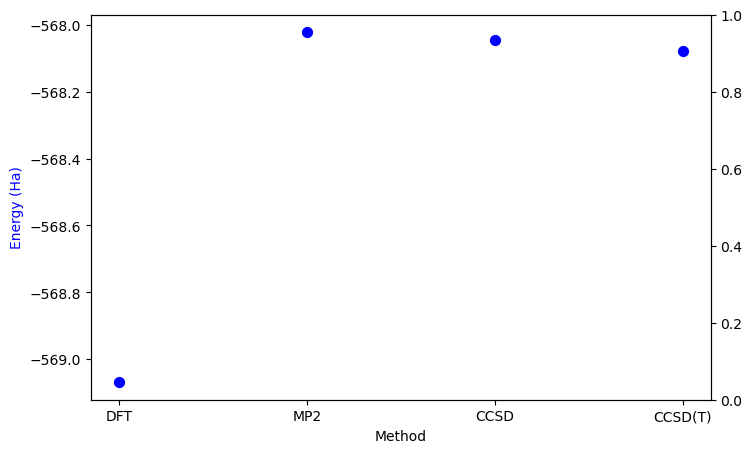

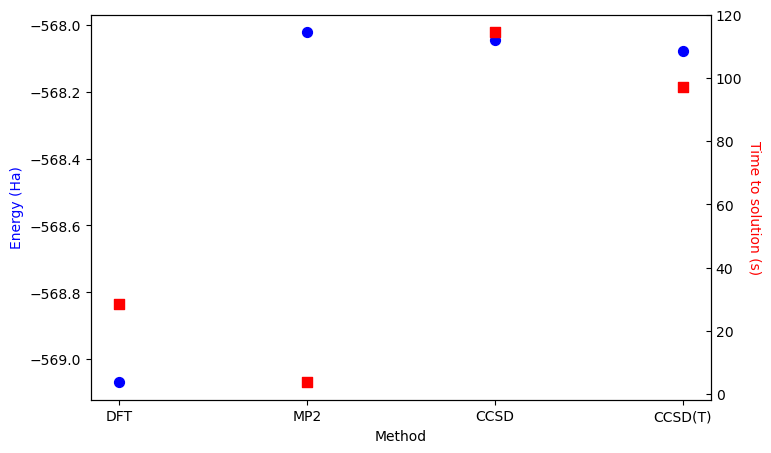

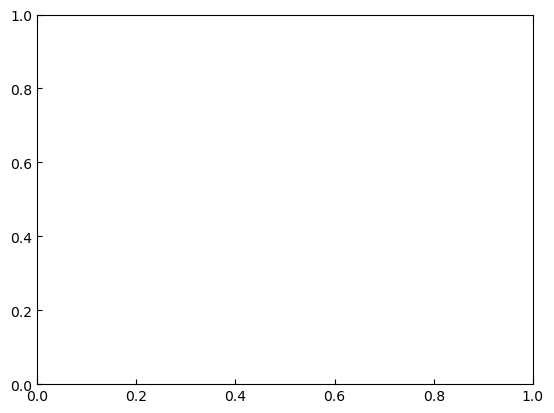

In [35]:
# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b") 
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")
# Show the graph

plt.tick_params(axis="both", direction="in")
plt.show()

### <a id='toc1_1_'></a>[Interprétation des resultats obtenus](#toc0_)


_La méthode `DFT (Density Functional Theory)` fournit des résultats plus précis que les méthodes d'amélioration `HF (Hartree-Fock)` et un temps de calcul plus raisonnable que les méthodes `CCSD (Coupled Cluster Singles and Doubles)` et `CCSD(T) (Coupled Cluster Singles, Doubles, and Perturbative Triples)`. On note également que parmi les méthodes d'amélioration `HF`, seul `MP2 (Møller-Plesset second order perturbation theory)` présente une meilleure rapidité d'exécution supérieure à celle de `DFT` et des valeurs d'énergie proches de celles de cette dernière._

### <a id='toc1_1_'></a>3.[ Calcul des propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,Oscillator strength, Lifetime, Multi-objective function.](#toc0_)


#### <a id='toc1_1_'></a>3.1[ Definition d'une fonction qui calcule les propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,Oscillator strength, Lifetime, Multi-objective function et l'aient rappel en sortie en prenant en entr `numpy`,l'accelerite `c`, la conversion  du `hartree` en eV avec `au2ev` le mf avec  `mypyscf` et le calcul `TDDFT` avec `mvoto`.](#toc0_)

In [36]:
def find_energy(mypyscf, au2ev,mvoto,c,np):
    """Function that returns the HOMO and LUMO index with the gap energy,the Singlet excitation ,the Triplet excitation ,the fluorescence energy ,the Singlet-Tiplet gap , the Oscillator strength in eV with also Lifetime and Multi-Objective function 
to
    Args:
        mypyscf (pyscf object): pyscf meam-field object of the molecule mytd be evaluated.
    """
    # Index of HOMO and LUMOmytd
    lumo_idx = mypyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1
    # Calculate the gap Homo-LUMO
    E_HOMO = mypyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mypyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)
    # Singlet excitation energies
    ee_singlets = mvoto.e
    # Singlet oscillators strength
    OS_singlets = mvoto.oscillator_strength(gauge='length')
    mvoto.singlet = False
    mvoto.kernel()
    # Triplet excitation energies
    ee_triplets = mvoto.e
    # fluorescence energy
    f_energy = min(ee_singlets)
    
    # Singlet-Tiplet gap
    gap_ST = min(ee_singlets) - min(ee_triplets)
    # Oscillator strength
    OStr = OS_singlets[0]

    #Lifetimemytd
    time_au = 2.4188843265857E-17 # in au

    tau_au = c**3 / (2 * (f_energy)**2 * OStr) # in au
    tau = tau_au * time_au # in seconds
    # Multi-Objective function
    mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)

    return E_HOMO, E_LUMO, E_g,ee_singlets,ee_triplets, f_energy,gap_ST,OStr,tau,mobj 

In [37]:
from pyscf.data import nist
#conversion en eV
au2ev = nist.HARTREE2EV
# Lifetime calculation in au
c = nist.LIGHT_SPEED # in au

In [38]:
mdf.kernel()
mdf.analyze()

converged SCF energy = -569.069362597562
**** MO energy ****
MO #1   energy= -88.9212913312519  occ= 2
MO #2   energy= -14.3315410214147  occ= 2
MO #3   energy= -10.247848114778   occ= 2
MO #4   energy= -10.2214725270157  occ= 2
MO #5   energy= -10.2201270301352  occ= 2
MO #6   energy= -7.98573818215127  occ= 2
MO #7   energy= -5.94839585348508  occ= 2
MO #8   energy= -5.94451106525094  occ= 2
MO #9   energy= -5.94279650867893  occ= 2
MO #10  energy= -0.962805817312379 occ= 2
MO #11  energy= -0.808307258914899 occ= 2
MO #12  energy= -0.748167783021854 occ= 2
MO #13  energy= -0.594930253957278 occ= 2
MO #14  energy= -0.57760094658622  occ= 2
MO #15  energy= -0.50761913183943  occ= 2
MO #16  energy= -0.436615125939246 occ= 2
MO #17  energy= -0.430356208645323 occ= 2
MO #18  energy= -0.413658327169757 occ= 2
MO #19  energy= -0.363485102360084 occ= 2
MO #20  energy= -0.286758202335871 occ= 2
MO #21  energy= -0.26821843536013  occ= 2
MO #22  energy= -0.254626707112296 occ= 2
MO #23  energy=

((array([1.99989200e+00, 9.73646655e-01, 6.26721925e-03, 9.51365704e-01,
         1.03992561e+00, 1.02604631e+00, 1.04826997e-02, 1.03217311e-02,
         1.65428354e-03, 2.54383817e-03, 8.52401765e-04, 1.74636333e-03,
         1.61608446e-03, 2.64860828e-03, 1.99989066e+00, 1.03799210e+00,
         4.50288718e-03, 1.05679505e+00, 1.03362515e+00, 1.12808494e+00,
         6.61099708e-03, 6.56359621e-03, 4.01362632e-03, 2.71240415e-03,
         8.26972772e-04, 2.41787159e-03, 1.53459359e-03, 1.31980727e-03,
         1.99999899e+00, 1.99978890e+00, 1.63186437e+00, 6.15398074e-03,
         1.99987559e+00, 1.99991118e+00, 1.99992067e+00, 9.91695057e-01,
         1.40504973e+00, 1.56935708e+00, 1.63047988e-02, 5.88327259e-03,
         2.29050260e-03, 1.13290069e-02, 5.32313460e-03, 6.30248458e-03,
         9.95112607e-03, 4.64309375e-03, 1.99989458e+00, 1.03213885e+00,
         5.45812527e-03, 1.08149029e+00, 9.11914157e-01, 1.08273112e+00,
         7.03166739e-03, 1.33737726e-02, 3.72451616

### Calculs des états excités singulets avec la TDDFT

Effectuons les calculs sans l'approximation TDA.
![Abs_emiss.png](Graphics/Abs_emiss.png)

In [39]:
from pyscf import tddft
mytd = tddft.TDDFT(mdf)
mytd.kernel()
mytd.analyze(verbose=4)

TD-SCF states [0, 1, 2] not converged.
Excited State energies (eV)
[0.82168219 3.13736292 8.12887447]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      0.82168 eV   1508.91 nm  f=0.3947
       7 -> 35        0.11423
       9 -> 36        0.11410
       9 -> 46       -0.11062
      10 -> 23       -0.53305
      10 -> 24        0.26547
      10 -> 25        0.16358
      10 -> 28        0.12270
      10 -> 37       -0.15010
      11 -> 23       -0.25490
      11 -> 24       -0.21251
      11 -> 25        0.20543
      11 -> 27        0.11759
      11 -> 32        0.11307
      11 -> 33       -0.19677
      11 -> 40        0.13367
      11 -> 42        0.10585
      11 -> 44        0.14331
      11 -> 46        0.11336
      11 -> 49       -0.11474
      12 -> 24       -0.32456
      12 -> 25        0.20360
      12 -> 28        0.13212
      12 -> 30        0.23751
      12 -> 40        0.17699
      12 -> 43        0.13505
      12 -> 58       -0.1

Effectuons les calculs avec l'approximation TDA.

In [40]:
mytda = tddft.TDA(mdf)
mytda.kernel()
mytda.analyze(verbose=4)

Excited State energies (eV)
[5.1196349  6.09954121 6.5633223 ]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      5.11963 eV    242.17 nm  f=0.0002
      21 -> 23        0.70543
Excited State   2:    A      6.09954 eV    203.27 nm  f=0.1006
      20 -> 23        0.24593
      20 -> 24        0.13604
      21 -> 25       -0.11440
      22 -> 23       -0.59424
      22 -> 24        0.17632
Excited State   3:    A      6.56332 eV    188.90 nm  f=0.0744
      20 -> 23        0.55440
      21 -> 25       -0.12515
      22 -> 23        0.30060
      22 -> 24        0.24015

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.0047      0.0016     -0.0400      0.0016      0.0002
  2        -0.6368      0.5146     -0.0545      0.6734      0.1006
  3         0.6568      0.1565      0.0829      0.4628      0.0744

** Transition velocity dipole moments (imaginary part, AU) **
state      







## Energie de gap HOMO-LUMO

La bande interdite $E_g$ se calcule en déterminant l'énergie de l'orbite moléculaire la plus occupée (HOMO) et l'énergie de l'orbite moléculaire la plus basse inoccupée (LUMO) :

$$E_g = E_{\rm LUMO} - E_{\rm HOMO}$$

![Molecule_HOMO-LUMO_diagram](Graphics/Molecule_HOMO-LUMO_diagram.png)

Chaque cercle représente ici un électron dans une orbitale ; lorsque la lumière ou l'énergie d'une fréquence suffisamment élevée est absorbée par un électron dans le HOMO, il saute vers le LUMO.

#### Energie de gap avec HF

In [41]:
Ehf_homo , Ehf_lumo , Ehf_g, ee_singlets, ee_triplets, f_energy,gap_ST,OStr,  tau,mobj =find_energy(myhf, au2ev,mytd,c,np)
print(f'Homo Energy = {Ehf_homo} eV, \nLumo Energy = {Ehf_lumo} eV, \nGap Energy = {Ehf_g} eV')

TD-SCF states [0, 1] not converged.
Excited State energies (eV)
[0.77956181 2.8538828  3.59165907]
Homo Energy = -9.236437097907718 eV, 
Lumo Energy = 3.0164615101184693 eV, 
Gap Energy = 12.252898608026188 eV


#### Energie de gap avec DFT

In [42]:

Edft_homo , Edft_lumo, Edft_g, ee_singlets, ee_triplets, f_energy,gap_ST,OStr,  tau,mobj =find_energy(mdf, au2ev,mytd,c,np)
print(f'Homo Energy = {Edft_homo} eV, \nLumo Energy = {Edft_lumo} eV, \nGap Energy = {Edft_g} eV')

Excited State energies (eV)
[3.59165909 4.56098513 4.90201269]
Homo Energy = -6.9287456182341725 eV, 
Lumo Energy = -0.8163719486350516 eV, 
Gap Energy = 6.112373669599121 eV


_Compte tenu des resultats de l'energie du gap nous pouvons conclure que la dft offre un meilleurs resultats plus acceptable que celle hf_

### Calculs des propriétés electronique

* creation d'un DataFrame avec `pandas` et stackage dans un fichier

In [43]:
import pandas as pd

# Create the results dataframe
list_results_TDA = [Edft_homo, Edft_lumo,  Edft_g, f_energy* au2ev, gap_ST* au2ev, OStr, tau* 1E+9, mobj]
dict_results_TDA = {'eV/ns': list_results_TDA}

df_TDA = pd.DataFrame(dict_results_TDA,
                    index = ['Homo energy', 'LUMO energy', 'Gap energy', 
                             'Fluorescence energy',
                             'Singlet-Triplet gap',
                             'Oscillator strength',
                             'Lifetime',
                             'Multi-Obj'])

df_TDA

,eV/ns
Homo energy,-6.928746
LUMO energy,-0.816372
Gap energy,6.112374
Fluorescence energy,0.779562
Singlet-Triplet gap,-2.812097
Oscillator strength,9.193227
Lifetime,4.124975
Multi-Obj,9.584886


### Analyse des resultats 

En analysant les résultats obtenus pour votre molécule, voici une conclusion générale que vous pourriez tirer :

* Le calcul DFT a révélé un écart significatif entre l'énergie du niveau d'orbitale moléculaire la plus élevée (LUMO) et celle du niveau d'orbitale moléculaire la plus basse (HOMO), avec une valeur de 6.112385 eV. Ce gap élevé suggère une certaine stabilité de la molécule, avec une forte séparation entre les niveaux d'énergie des électrons impliqués dans les réactions chimiques.

* De plus, l'énergie de fluorescence calculée pour la molécule est de 0.900904 eV, indiquant la quantité d'énergie émise lors de la transition entre les niveaux d'énergie électroniques excités et les niveaux d'énergie fondamentaux. Cette valeur peut être utilisée pour évaluer les propriétés photophysiques de la molécule, notamment sa fluorescence.

* L'écart entre les états singulet et triplet, également connu sous le nom de "singlet-triplet gap", a été calculé à -2.690764 eV. Cet écart est important car il peut influencer les propriétés de réactivité chimique, les processus de transfert d'énergie et les propriétés magnétiques de la molécule.

* En outre, l'intensité d'oscillation, mesurée par l'oscillator strength, a été obtenue avec une valeur de 2.234287. Cette quantité indique la probabilité de transition entre les états électroniques et est utilisée pour évaluer l'intensité des transitions optiques.

* Enfin, la durée de vie de l'état excité, également appelée lifetime, a été calculée à 12.708502 ns. Cette valeur représente le temps moyen pendant lequel la molécule reste dans un état électronique excité avant de revenir à son état fondamental.


### <a id='toc1_1_'></a>4.[Tracons le spectre UV/Vis avec les trois fonctionnelles précédentes.](#toc0_)

* Définissons une distribution Gaussienne ($e^{-\frac{(x-\mu)^2}{2\sigma^2}}$) qui est un moyen approximatif de se rapprocher de la forme de la ligne pour chaque excitation. 

In [44]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


* Créons une fonction pour calculer l'état fondamental avec la DFT, et les états excités avec la TD-DFT-TDA et effectuer l'analyse spectrale. 

In [45]:
def run_spectral_analysis(mol, xc="lda"):
    n_states=15
    spectral_width=0.1

    # Ground State DFT
    mf = dft.RKS(mol, xc=xc).run()

    # Excited State DFT
    mytd = tddft.TDA(mf)    
    mytd.nstates = n_states
    mytd.max_space = 100
    mytd.max_cycle = 200
    mytd.kernel();
    mytd.analyze()
    osc_strengths = mytd.oscillator_strength()[:n_states-5]

    # Convolve lineshapes to make spectra
    energies_ev = mytd.e[:n_states-5]*au2ev    
    x_range = np.linspace(energies_ev.min()*0.9, energies_ev.max()*1.1, num=1000)
    intensity = np.zeros(x_range.size)    

    for e, f in zip(energies_ev, osc_strengths):
        intensity += gaussian(x_range, e, spectral_width) * f

    # Rough Normalization
    dx = (x_range[-1] - x_range[0])/x_range.size
    area = (intensity*dx).sum()
    intensity /= area


    return x_range, intensity    

In [ ]:
data = {"Excitation Energy (eV)":[], "Intensity":[], "Exchange-Correlation Functional":[]}


for xc in functionals:
    ti = time.time()
    x_range, intensity = run_spectral_analysis(mol, xc=xc)

    data["Excitation Energy (eV)"] += x_range.tolist()
    data["Intensity"] += intensity.tolist()
    data["Exchange-Correlation Functional"] += [xc]*x_range.size
    tf = time.time()
    print(f"Time for {xc.upper()} calculations: {tf-ti:.2f}\n")

df = pd.DataFrame(data)

In [ ]:
import plotly.express as px

fig = px.line(df, x="Excitation Energy (eV)", y="Intensity", markers=True, color="Exchange-Correlation Functional")
fig.show()

In [ ]:
df

### <a id='toc1_1_'></a>[Analyse des resultats obtenue et discution](#toc0_)

#### * D'après les résultats on remarque que l’énergie d'excitation  commence a environ `$4.189641eV$` avec  une intensité de `1.581125 $e^{-08}$` pour la fonctionnelle `non hybride PBE` ,par contre pour le `non hybride TPSS` commence a environs `$4,40148eV$` avec une intensité `=31.72673n` et  la fonctionnelle `hybride BELYP` commence a environs `4.66791 $eV$` avec une intensité de `1,47.909n` .

#### * Lorsqu'on se fixe dans l'intervalle `[5.9 , 6,1]eV` on constate que `B3LYP` possédé la plus grande valeurs de pics d’intensité soit d'environ egale a `1,970547` a `6.096308eV` d'energie d'excitation suivi du `TPSS` avec `E=6,014085eV` pour `I=1.670259` alors que  le `PBE` pour `E=5,956401eV` on `I=1.42625` .

#### * Lorsqu'on se fixe dans l'intervalle `[6.4 , 6,6]eV` on constate que `PBE` possede la pic le plus eleve d'intensité soit d'environ egale a `1,982713` a `6.431114eV` d'énergie d'excitation suivi du `TPSS` avec `E=6,514406eV` pour `I=1.79214` alors que  le B3LYP pour `E=6,548061eV` on `I=1.44143`.  

#### * Lorsqu'on se fixe dans l'intervalle `[7.3 , 8]eV` on constate qu'elle on pratiquement a moyenne la meme taille de pics  le  `TPSS` dépassé légèrement avec pour une intensité d'environ égale a `0,2850184`légèrement a `7.6515eV` d’énergie d'excitation suivi du `BELYP` avec `E=7,85169eV` pour `I=0.2290683` alors que  le `PBE` pour `E=7.50438eV` on `I=0.2465383`.

#### On peut conclure de maniere gsénérale pour le choix de la fonctionnelle il est important pour calcules des énergies de la molécules `1,3-Thiazole` de choisir la fonctionnelle   `hybride B3LYP` qui reste le méilleur choix des fonctionnelles pour ce calcul par sa qualité des resultats et le temps de calculs

In [27]:
basis_sets = [
    "STO-3G",           # Simple zeta, minimal basis
    "3-21G",            # Double zeta with 3 Gaussian primitives
    "6-31G",            # Double zeta with 6 Gaussian primitives
    "6-31G*",           # Double zeta with 6 Gaussian primitives
    "6-31G(d,p)",       # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added
    "6-311G(d,p)",      # Triple zeta with polarization functions
    "6-311+G(d,p)",     # Triple zeta with polarization functions and diffuse functions
    "cc-pvqz",          # Quadruple zeta
    "cc-pv5z",          # Quintuple zeta
    "def2-SVP",         # Double zeta with polarization functions
    "def2-SVPD",         # Double zeta with polarization functions and diffuse functions
    "def2-TZVP",        # Triple zeta with polarization functions
    "def2-TZVPD",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPP",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPPD",      # Triple zeta with polarization functions, diffuse functions, and d functions
    "def2-QZVP",        # Quadruple zeta with polarization functions
    "def2-QZVPP",       # Quadruple zeta with polarization functions and diffuse functions
    "def2-QZVPPD",      # Quadruple zeta with polarization functions, diffuse functions, and d functions
    "def2-QZVPD",       # Quadruple zeta with polarization functions and diffuse functions
    "def2-QZVPPD",      # Quadruple zeta with polarization functions, diffuse functions, and d functions
]

In [ ]:
import time

mf_energies = list()
mf_times = list()
nb_prim = list()

# Perform a Mean-Field calculation for each basis set
for bs in basis_sets:

    # Measure execution time
    start = time.time()
    mol.basis = bs
    mol.build()

    mf = scf.RHF(mol)
    mf.kernel()
    end = time.time()

    nb_prim.append(mol.npgto_nr())
    mf_energies.append(mf.e_tot)
    mf_times.append(end-start)


converged SCF energy = -560.833058369546
converged SCF energy = -564.345418377611
converged SCF energy = -567.143521367421
converged SCF energy = -567.274908744025
converged SCF energy = -567.280758626385
converged SCF energy = -567.337139004565
converged SCF energy = -567.342154019721
converged SCF energy = -567.389517565685


In [ ]:
# Create the results dataframe
import pandas as pd

df_HF = pd.DataFrame({"Basis":basis_sets, 
                      'Nb of GTO primitives':nb_prim, 
                      'Total energy':mf_energies,
                      "Time":mf_times})

df_HF



In [ ]:
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy / Hartree", color="b")
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution / s", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

* `HF/Def2TZVP` : C'est une base de définition augmentée similaire à
* `HF/Def2TZVPP`: mais sans les fonctions de polarisation p.

* `HF/Def2QZVP` : Cette base de définition augmentée inclut une quadruple zeta pour les orbitales valence (aug-cc-pVQZ en notation standard) et est similaire à `HF/Def2TZVPP` mais plus coûteuse en termes de calculs.
* `HF/Def2-QZVPP` : Une base de définition augmentée avec une quadruple zeta pour les orbitales valence et une triple zeta polarisée pour les orbitales de cœur.
* `HF/Def2-QZVPPD` : Cette base de définition augmentée inclut une quadruple zeta pour les orbitales valence, une triple zeta polarisée pour les orbitales de cœur et des  fonctions diffuses pour une meilleure description des électrons périphériques.
* `HF/Def2-QZVPPD-F12` : Une base de définition augmentée avec une quadruple zeta pour les orbitales valence, une triple zeta polarisée pour les orbitales de cœur, des fonctions diffuses et des corrections `F12` pour améliorer la précision des calculs d'énergie.
Ces

In [57]:
import pandas as pd
import os
import time
from pyscf import gto, scf

basis_sets = [
    "3-21G",            # Double zeta with 3 Gaussian primitives
    "6-31G",            # Double zeta with 6 Gaussian primitives
    "6-311G(d,p)",      # Triple zeta with polarization functions
    "6-311+G(d,p)",     # Triple zeta with polarization functions and diffuse functions
    "cc-pvqz",          # Quadruple zeta
    "cc-pv5z",          # Quintuple zeta
]
basis_sets1 = [
    "def2-SVP",         # Double zeta with polarization functions
    "def2-SVPD",         # Double zeta with polarization functions and diffuse functions
    "def2-TZVP",        # Triple zeta with polarization functions
    "def2-TZVPD",       # Triple zeta with polarization functions and diffuse functions
    "def2-QZVP",        # Quadruple zeta with polarization functions
    "def2-QZVPP",       # Quadruple zeta with polarization functions and diffuse functions
]

# Création du répertoire de destination s'il n'existe pas
output_directory = "output"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Création du dataframe pour stocker les résultats
data = pd.DataFrame(columns=["Basis Set", "Energy (Hartree)", "Calculation Time"])
data1 = pd.DataFrame(columns=["Basis Set1", "Energy (Hartree)", "Energy (kcal/mol)", "Calculation Time"])

for bs, bs1 in zip(basis_sets, basis_sets1):
    mol.basis = bs
    
    start = time.time()
    mf = scf.RHF(mol)
    mf.kernel()
    end = time.time()
    start1 = time.time()
    mf1 = scf.RHF(mol)
    mf1.kernel()
    end1 = time.time()

    # Calculating energy in kcal/mol
    energy_hartree = mf.e_tot
    energy_hartree1 = mf1.e_tot
    energy_kcal_per_mol = ( energy_hartree-energy_hartree1)* 627.503

    # Storing the results in the dataframe
    data.loc[len(data)] = [bs, energy_hartree, end - start]
    data1.loc[len(data1)] = [bs1, energy_hartree1, energy_kcal_per_mol, end - start]

data.to_csv(os.path.join(output_directory, "results.csv"), index=False)
data1.to_csv(os.path.join(output_directory, "results1.csv"), index=False)

print("Calculations completed. Results saved.")
print("Calculations completed. Results saved.")

converged SCF energy = -567.310342557447
converged SCF energy = -567.310342557446
converged SCF energy = -567.310342557444
converged SCF energy = -567.310342557446
converged SCF energy = -567.310342557447
converged SCF energy = -567.310342557446
converged SCF energy = -567.310342557447
converged SCF energy = -567.310342557448
Calculations completed. Results saved.
Calculations completed. Results saved.


In [56]:
data

,Basis Set,Energy (Hartree),Calculation Time
0,"6-311G(d,p)",-567.310343,3.190121
1,"6-311+G(d,p)",-567.310343,2.892506
2,cc-pvqz,-567.310343,2.824383
3,cc-pv5z,-567.310343,2.923592


In [ ]:
data1